In [1]:
import time
import pandas as pd
from tqdm import tqdm

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = fetch_20newsgroups(subset="all", shuffle=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)
print(f"training data: {len(X_train)}")
print(f"testing data: {len(X_test)}")
print(f"categories: {len(set(y_test))}")

training data: 13192
testing data: 5654
categories: 20


In [3]:
def train(pipeline, X_train, y_train, X_test, y_test):
    # define pipeline
    pipe = Pipeline(pipeline)

    # train model
    train_start = time.time()
    pipe.fit(X_train, y_train)
    train_time = time.time() - train_start

    # test model
    test_start = time.time()
    score = pipe.score(X_test, y_test)
    test_time = time.time() - test_start

    model_name = '+'.join([pipe[0] for pipe in pipeline])

    return model_name, score, train_time, test_time


In [4]:
# models to train
vectorizer = ('tfidf', TfidfVectorizer(stop_words="english"))
model = [
('sgd', SGDClassifier()), 
('ridge', RidgeClassifier()),
('perceptron', Perceptron()),
('passiveaggressive', PassiveAggressiveClassifier()),
('kNN', KNeighborsClassifier()),
('svc', LinearSVC()),
('multi_NB', MultinomialNB()),
('CNB', ComplementNB()),
('logreg', LogisticRegression())
]


In [5]:
results = []
# loop models to get result
for ind in tqdm(range(len(model))):
    pipeline = [vectorizer, model[ind]]
    result = train(pipeline, X_train, y_train, X_test, y_test)
    results.append(result)

100%|██████████| 9/9 [03:38<00:00, 24.32s/it]


In [6]:
result_df = pd.DataFrame(results, columns=['model', 'accuracy', 'train_time', 'test_time'])
result_df.index = result_df['model']
result_df

,model,accuracy,train_time,test_time
model,,,,
tfidf+sgd,tfidf+sgd,0.920410,8.181007,2.316995
tfidf+ridge,tfidf+ridge,0.926070,13.852002,1.381994
tfidf+perceptron,tfidf+perceptron,0.894588,4.415010,1.340991
tfidf+passiveaggressive,tfidf+passiveaggressive,0.925893,4.585995,1.252998
tfidf+kNN,tfidf+kNN,0.794305,3.256038,5.481959
tfidf+svc,tfidf+svc,0.926601,10.232004,1.640995
tfidf+multi_NB,tfidf+multi_NB,0.873364,6.001003,3.586001
tfidf+CNB,tfidf+CNB,0.902016,6.597993,2.078996
tfidf+logreg,tfidf+logreg,0.901486,141.116002,1.505998


<AxesSubplot:ylabel='model'>

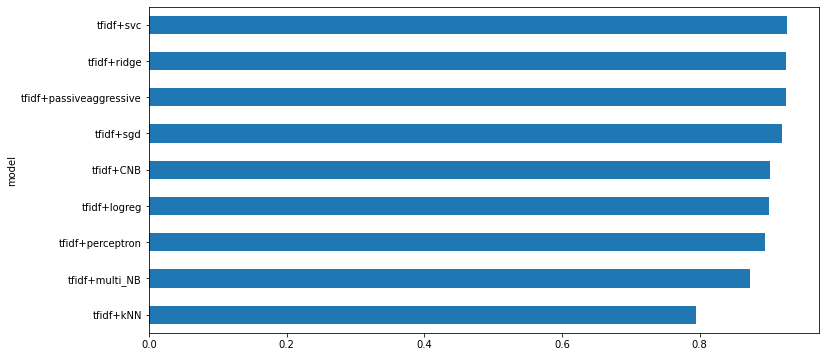

In [7]:
result_df.sort_values(by='accuracy').accuracy.plot(kind='barh', figsize=(12,6))

In [8]:
result_df.to_csv("sklearn.csv")